# 02_Downsampling 

This file imports the splittet data files (train, validation and test) for each location and downsamples them to the desired target resolutions.

In [17]:
# given resolutions of the original imagery after data extraction

resolutions = {
        'AR': 0.1521273311113449, # m/pixel
        'SU': 0.2941356391155026,
        'CH': 0.2789294695267606,
        'RO': 0.1254966590856217,
        'ME': 0.1522336654793647,
        'KA': 0.1520310125331718,
        'CL': 0.1535755375821943,
        'WI': 0.1522415121091316,
        'DU': 0.1229411434163525,
        'GI': 0.1253881937589445,
        'PA': 0.1255661866324052,
        'TA': 0.1254967811385344,
        }

In [3]:
!pip install scikit-image
!pip install opencv-python

     |████████████████████████████████| 13.4 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 64.4 MB/s eta 0:00:01
     |████████████████████████████████| 43.4 MB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 63.3 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

linear-operator 0.3.0 requires torch>=1.11, but you'll have torch 1.9.0+cu111 which is incompatible.
botorch 0.8.3 requires torch>=1.12, but you'll have torch 1.9.0+cu111 which is incompatible.
You should con

In [5]:
# import relevant packages

import os

from matplotlib import pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import cv2

import numpy as np
from PIL import Image
from skimage.io import imread, imsave
from tqdm import tqdm

## Set-up all target folders

In [18]:
# set base path to the folder with original imagery after data extraction

base_path = "/workspace/data_000_mexico_new"

os.chdir(base_path)

In [19]:
# set the target resolutions

target_resolutions = ['030'] #[,'035','040','045','050','070','100','150', '200','250','300']

In [22]:
# create all target folders

os.chdir("/workspace/data")

#make a subfolder for each resolution 
for res in target_resolutions:
    os.chdir("/workspace/data")
    os.makedirs(f"data_{res}_mexico",exist_ok=True)
    
    #set up the three modes
    for mod in ['train','val','test']:
        os.chdir(f"/workspace/data/data_{res}_mexico")
        os.makedirs(mod, exist_ok = True)
        os.chdir(f"/workspace/data/data_{res}_mexico/{mod}")
        os.makedirs('data', exist_ok=True)

In [24]:

def downsample_image(filename, target_res, target_dir, resolutions):
    
    """
    Downsamples an image given a target resolution, saving it in a target folder.
    
    Arguments:
    
    filename            -- the path to the image file, where file names start with a two-letter string depending on the country
    target_res          -- a float specifying the target resolution in meter/pixel to which the image should be downsampled
    target_dir          -- the path to the folder in which the downsampled images should be saved
    resolutions         -- a dictionary where the keys are two-letter strings for each country and
                           the values are the corresponding base resolutions to be returned
  
    """

    prefix = filename[:2]
    base_res = resolutions[prefix]
    #print(f'base resolution is {base_res}')

    # calulcate the donwscaling factor
    scaling_factor = base_res / target_res
    #print(f'scaling factor is {scaling_factor}')

    #load image
    base_img = cv2.imread(filename)

    # convert BGR to RGB color space
    base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
    #print(base_img)

    # downsample the image to match the target resolution and apply gaussian filter with anti_aliasing TRUE
    img_downsampled = rescale(base_img, scaling_factor, channel_axis=2, anti_aliasing=True)
    #print(img_downsampled.shape)

    # Get the downsampled size
    shape = img_downsampled.shape
    size = shape[0]

    # calculate resizing factor to get the image back to 512 x 512
    resize_factor = 512 / size
    #print(f'resize factor is {resize_factor}')

    # resize the image up to 512 x 512
    img_resized = rescale(img_downsampled, resize_factor, channel_axis=2)

    # Scale the pixel values to the range [0, 255]
    img_uint8 = (img_resized * 255).astype(np.uint8)

    # Save the image as a PNG file in the target directory
    imsave(target_dir + filename, img_uint8)
    #print(f'saved file to {target_dir}')

    return


### For just one resolution (commeted out so it doesn't run on accident)

In [30]:
#target_folder = '/workspace/data/data_40/train/data/'

In [31]:
#files = os.listdir(folder_path)
#print(files)

In [32]:
#len(files)

In [33]:
#for file in tqdm(files):
#    downsample_image(file,0.4,target_folder,resolutions)

### For a whole list of resolutions

In [25]:
# double check target resolutions
print(target_resolutions)

['030']


In [30]:
# make sure to change to the correct folder_path and target_folder

for res in tqdm(target_resolutions):
    
    print(f'currently downsampling to resolution {res}')
    
    for mod in ['train','val','test']:
        print(f'currently downsampling to resolution: {res} and mode: {mod}')
        
        folder_path = f'/workspace/data/data_000_mexico_60-90/data_000_mexico_new_{mod}_None/data/'
        target_folder = f'/workspace/data/data_{res}_mexico_60-90/{mod}/data/'
        
        print("Saving into folder: " + target_folder)
        
        os.chdir(folder_path)
        
        files = os.listdir(folder_path)
        
        for file in files:
            resolution = int(res)/100
            downsample_image(file,resolution,target_folder,resolutions)

  0%|          | 0/1 [00:00<?, ?it/s]

currently downsampling to resolution 030
currently downsampling to resolution: 030 and mode: train
Saving into folder: /workspace/data/data_030_mexico_60-90/train/data/
currently downsampling to resolution: 030 and mode: val
Saving into folder: /workspace/data/data_030_mexico_60-90/val/data/
currently downsampling to resolution: 030 and mode: test
Saving into folder: /workspace/data/data_030_mexico_60-90/test/data/


100%|██████████| 1/1 [19:35<00:00, 1175.40s/it]


## Make Downsampling Example Figure for Thesis Text

this part of the script creates a figure to visualize the downsampling process for one example image.

In [44]:
# specify path to the example image

base_path = "/workspace/data/data_small_sample"

os.chdir(base_path)
os.chdir(os.path.join(os.getcwd(),'train_None/data'))

In [45]:
os.getcwd()

'/workspace/data/data_small_sample/train_None/data'

In [38]:
# define target resolutions

target_resolutions = ['1000']#,'050','070','100']

In [34]:
resolutions = {
        'AR': 0.1521273311113449, # m/pixel
        'SU': 0.2941356391155026,
        'CH': 0.2789294695267606,
        'RO': 0.1254966590856217,
        'ME': 0.1522336654793647,
        'KA': 0.1520310125331718,
        'CL': 0.1535755375821943,
        'WI': 0.1522415121091316,
        'DU': 0.1229411434163525,
        'GI': 0.1253881937589445,
        'PA': 0.1255661866324052,
        'TA': 0.1254967811385344,
        }

In [39]:
filename = 'RO_85.854716028649179_1025.0894103605845_245.png'
target_folder = '/workspace/figures/downsampling_vis/'

for res in target_resolutions:
    resolution = int(res)/100
    downsample_image(filename,resolution,target_folder,resolutions)

In [3]:
# import necessary packages to use the detectron2 visualizer


from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [48]:
# register the dataset from which the example imagery is selected as coco instance

register_coco_instances("downsampling_set_2", {}, "/workspace/data/data_small_sample/train_None/labels.json", "/workspace/data/data_small_sample/train_None/data")

In [49]:
dataset_custom = DatasetCatalog.get("downsampling_set_2")
dataset_custom_metadata = MetadataCatalog.get("downsampling_set_2").set(thing_classes=['DT', 'TT'])
filepath = [d for d in dataset_custom if 'RO_85.85' in d['file_name']]


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [20]:
dataset_custom_metadata

namespace(name='downsampling_set',
          json_file='/workspace/data/data_small_sample/train_None/labels.json',
          image_root='/workspace/data/data_small_sample/train_None/data',
          evaluator_type='coco',
          thing_classes=['DT', 'TT'],
          thing_dataset_id_to_contiguous_id={0: 0, 1: 1})

In [10]:
# manual construction of the filepaths so that all imagery, each downsampled to a certain resolution contains the same annotations

image_filepaths = [{'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_original013.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]},
 {'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_030.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]},
 {'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_050.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]},
 {'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_070.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]},
 {'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_100.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]}]

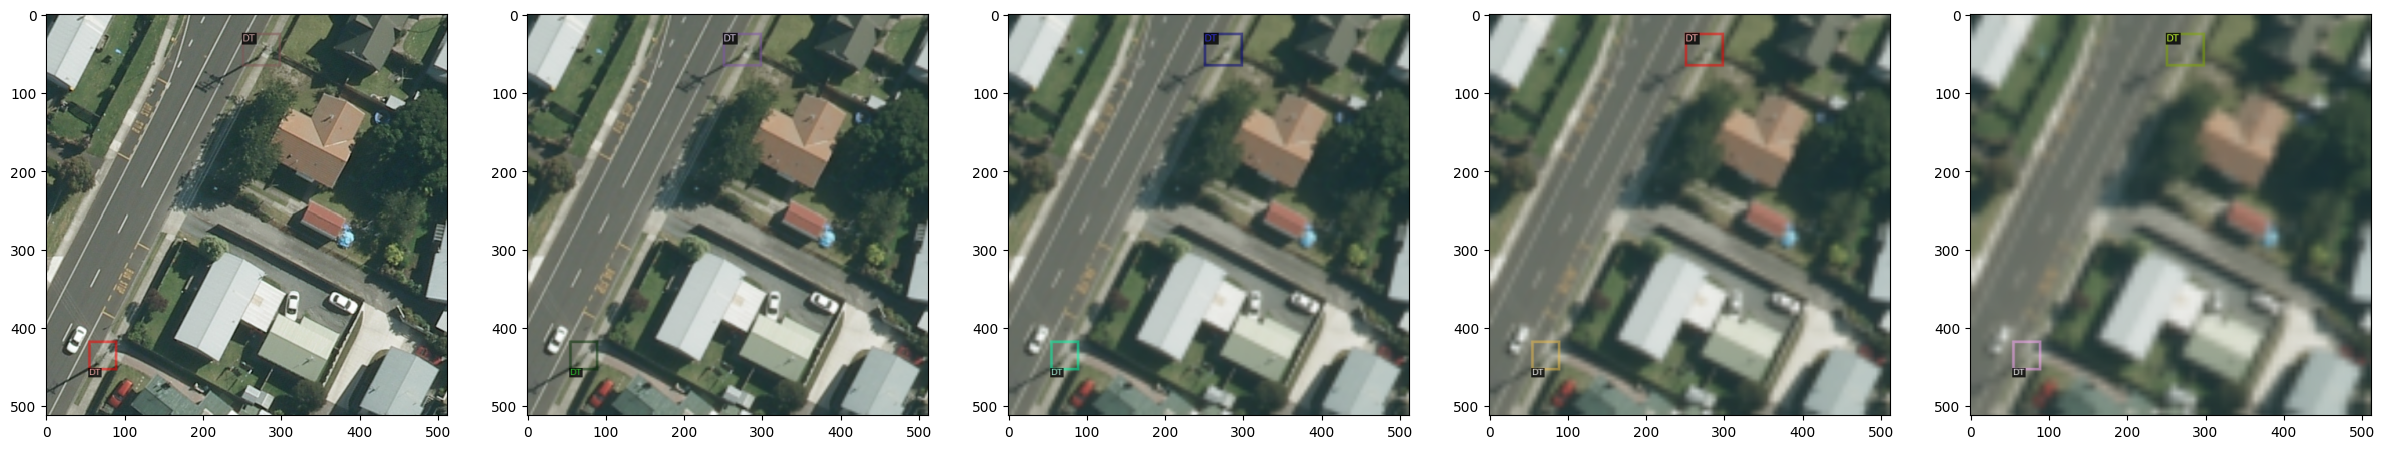

In [30]:
# create plot

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30, 6))

for i, s in enumerate(image_filepaths):
    img = cv2.imread(s["file_name"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    visualizer = Visualizer(img[:, :, ::-1], metadata=dataset_custom_metadata, scale=1.0, instance_mode=2)
    out = visualizer.draw_dataset_dict(s)
    ax[i].imshow(out.get_image()[:, :, ::-1])
#plt.savefig('/workspace/figures/downsampling_vis/image_downsampled_2.png')    
plt.show()

In [ ]:
# visualize for resolution 300 and 1000

In [50]:
filepaths_300_1000 = image_filepaths = [{'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_original013.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]},
 {'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_300.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]},
 {'file_name': '/workspace/figures/downsampling_vis/RO_85.854716028649179_1025.0894103605845_245_1000.png',
  'height': 512,
  'width': 512,
  'image_id': 2262,
  'annotations': [{'iscrowd': 0,
    'bbox': [55.0, 418.0, 34.0, 35.0],
    'category_id': 0,
    'bbox_mode': 1},
   {'iscrowd': 0,
    'bbox': [251.0, 25.0, 47.0, 40.0],
    'category_id': 0,
    'bbox_mode': 1}]}]

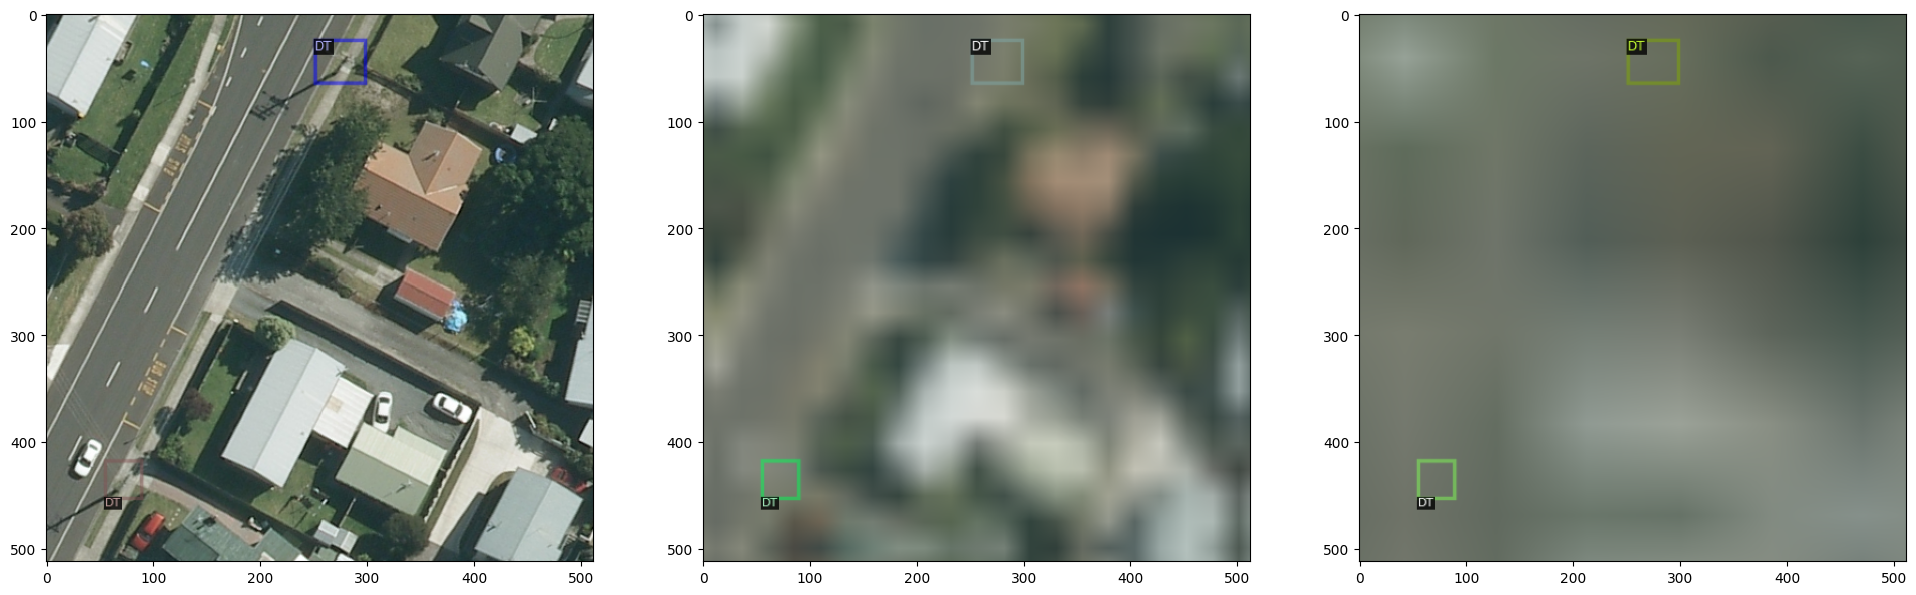

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

for i, s in enumerate(filepaths_300_1000):
    img = cv2.imread(s["file_name"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    visualizer = Visualizer(img[:, :, ::-1], metadata=dataset_custom_metadata, scale=1.0, instance_mode=2)
    out = visualizer.draw_dataset_dict(s)
    ax[i].imshow(out.get_image()[:, :, ::-1])
plt.savefig('/workspace/figures/downsampling_vis/image_downsampled_300_1000.png')    
plt.show()